In [1]:
import pandas as pd

file_path = r"C:\Users\eoinj\OneDrive\Documents\GitHub\ca2-EoinFitz24\biking_dataset.xlsx"
df = pd.read_excel(file_path)

print(df.head())

print("\nShape of the dataset (rows, columns):")
print(df.shape)

            City Weather Condition  Rider Age Bike Model  Ride Duration (min)  \
0         Berlin             Rainy       53.0   Standard                 62.0   
1  San Francisco            Cloudy       39.0   Standard                  5.0   
2         Berlin             Sunny       43.0   Electric                106.0   
3  San Francisco            Cloudy       24.0   Standard                119.0   
4       New York             Sunny       24.0   Mountain                 11.0   

   Distance Covered (km) Rider Satisfaction  Bike Rental Cost ($)  
0                   2.25               High                 22.63  
1                  21.67             Medium                  7.87  
2                  28.40               High                 39.40  
3                   5.66                Low                 37.63  
4                  25.74                Low                 13.12  

Shape of the dataset (rows, columns):
(900, 8)


In [2]:
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   890 non-null    object 
 1   Weather Condition      889 non-null    object 
 2   Rider Age              885 non-null    float64
 3   Bike Model             890 non-null    object 
 4   Ride Duration (min)    887 non-null    float64
 5   Distance Covered (km)  887 non-null    float64
 6   Rider Satisfaction     889 non-null    object 
 7   Bike Rental Cost ($)   891 non-null    float64
dtypes: float64(4), object(4)
memory usage: 56.4+ KB


In [3]:
print("\nMissing Values Per Column:")
print(df.isnull().sum())


Missing Values Per Column:
City                     10
Weather Condition        11
Rider Age                15
Bike Model               10
Ride Duration (min)      13
Distance Covered (km)    13
Rider Satisfaction       11
Bike Rental Cost ($)      9
dtype: int64


In [4]:
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())


Descriptive Statistics for Numeric Columns:
        Rider Age  Ride Duration (min)  Distance Covered (km)  \
count  885.000000           887.000000             887.000000   
mean    39.264407            62.225479              20.130530   
std     12.373803            33.956434              11.178777   
min     18.000000             5.000000               0.510000   
25%     29.000000            32.000000              10.830000   
50%     39.000000            62.000000              19.990000   
75%     50.000000            92.000000              29.155000   
max     60.000000           120.000000              39.870000   

       Bike Rental Cost ($)  
count            891.000000  
mean              26.581470  
std                9.438224  
min                7.330000  
25%               19.210000  
50%               27.040000  
75%               33.955000  
max               48.380000  


In [5]:
categorical_columns = ['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']

print("\nUnique Values in Categorical Columns:")
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Unique Values in Categorical Columns:

Column: City
City
London           186
Berlin           171
San Francisco    168
New York         168
Chicago          168
Dublin            29
Name: count, dtype: int64

Column: Weather Condition
Weather Condition
Rainy     245
Sunny     220
Snowy     218
Cloudy    206
Name: count, dtype: int64

Column: Bike Model
Bike Model
Mountain    298
Standard    297
Electric    294
Manual        1
Name: count, dtype: int64

Column: Rider Satisfaction
Rider Satisfaction
High      319
Medium    299
Low       271
Name: count, dtype: int64


In [6]:
with open("data_characterization_summary.txt", "w") as f:
    f.write("Dataset Shape: " + str(df.shape) + "\n\n")
    f.write("Dataset Information:\n")
    df.info(buf=f)
    f.write("\nMissing Values Per Column:\n")
    f.write(str(df.isnull().sum()) + "\n\n")
    f.write("Descriptive Statistics:\n")
    f.write(str(df.describe()) + "\n\n")

In [7]:
numeric_columns = ['Rider Age', 'Ride Duration (min)', 'Distance Covered (km)', 'Bike Rental Cost ($)']
categorical_columns = ['City', 'Weather Condition', 'Bike Model', 'Rider Satisfaction']

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing Values After Imputation:")
print(df.isnull().sum())

Missing Values After Imputation:
City                     0
Weather Condition        0
Rider Age                0
Bike Model               0
Ride Duration (min)      0
Distance Covered (km)    0
Rider Satisfaction       0
Bike Rental Cost ($)     0
dtype: int64


In [8]:
df.rename(columns={
    'City': 'city',
    'Weather Condition': 'weather_condition',
    'Rider Age': 'rider_age',
    'Bike Model': 'bike_model',
    'Ride Duration (min)': 'ride_duration',
    'Distance Covered (km)': 'distance_covered',
    'Rider Satisfaction': 'rider_satisfaction',
    'Bike Rental Cost ($)': 'bike_rental_cost'
}, inplace=True)

print("Renamed Columns:")
print(df.columns)

Renamed Columns:
Index(['city', 'weather_condition', 'rider_age', 'bike_model', 'ride_duration',
       'distance_covered', 'rider_satisfaction', 'bike_rental_cost'],
      dtype='object')


In [9]:
numeric_columns = ['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']

Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

df_outliers_removed = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape Before Removing Outliers:", df.shape)
print("Shape After Removing Outliers:", df_outliers_removed.shape)

df = df_outliers_removed

Shape Before Removing Outliers: (900, 8)
Shape After Removing Outliers: (900, 8)


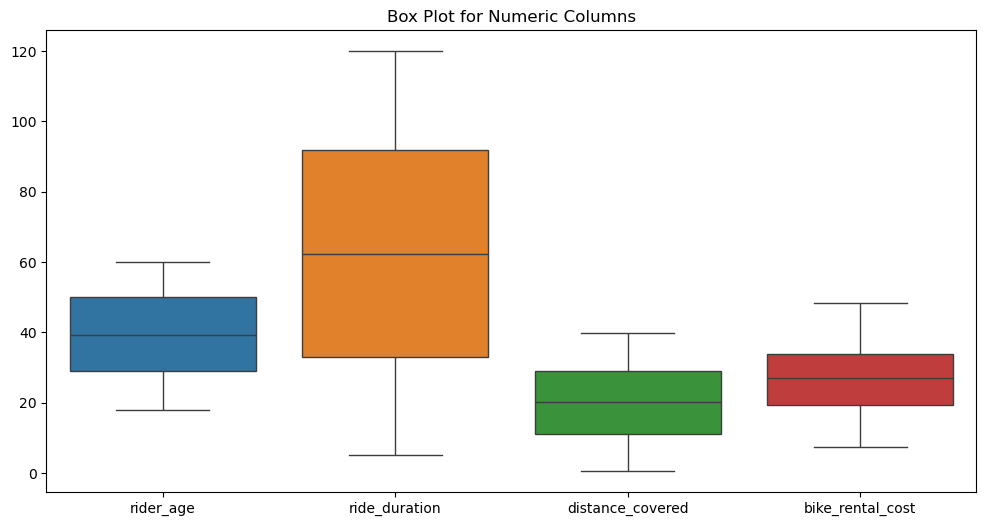

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']])
plt.title("Box Plot for Numeric Columns")
plt.savefig("box_plot_numeric_columns.png", dpi=300, bbox_inches="tight")
plt.show()

In [11]:
df_encoded = pd.get_dummies(df, columns=['city', 'weather_condition', 'bike_model', 'rider_satisfaction'], drop_first=False)

print("Categorical columns re-encoded.")
print("Columns after encoding:")
print(df_encoded.columns)

Categorical columns re-encoded.
Columns after encoding:
Index(['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost',
       'city_Berlin', 'city_Chicago', 'city_Dublin', 'city_London',
       'city_New York', 'city_San Francisco', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'bike_model_Electric', 'bike_model_Manual',
       'bike_model_Mountain', 'bike_model_Standard', 'rider_satisfaction_High',
       'rider_satisfaction_Low', 'rider_satisfaction_Medium'],
      dtype='object')


In [12]:
from sklearn.preprocessing import StandardScaler

numeric_columns = ['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']

scaler = StandardScaler()

df_encoded[numeric_columns] = scaler.fit_transform(df_encoded[numeric_columns])

print("Numeric columns scaled.")

Numeric columns scaled.


In [13]:
print("Descriptive Statistics for Numeric Columns:")
print(df[['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']].describe())

categorical_columns = [col for col in df_encoded.columns if col not in ['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']]
print("\nFrequency Counts for Categorical Columns:")
for col in categorical_columns:
    print(f"{col}:\n{df_encoded[col].value_counts()}\n")

Descriptive Statistics for Numeric Columns:
        rider_age  ride_duration  distance_covered  bike_rental_cost
count  900.000000     900.000000        900.000000        900.000000
mean    39.264407      62.225479         20.130530         26.581470
std     12.270139      33.710026         11.097657          9.390862
min     18.000000       5.000000          0.510000          7.330000
25%     29.000000      33.000000         11.040000         19.282500
50%     39.264407      62.225479         20.130530         26.970000
75%     50.000000      92.000000         29.027500         33.935000
max     60.000000     120.000000         39.870000         48.380000

Frequency Counts for Categorical Columns:
city_Berlin:
city_Berlin
False    729
True     171
Name: count, dtype: int64

city_Chicago:
city_Chicago
False    732
True     168
Name: count, dtype: int64

city_Dublin:
city_Dublin
False    871
True      29
Name: count, dtype: int64

city_London:
city_London
False    704
True     196
Name:

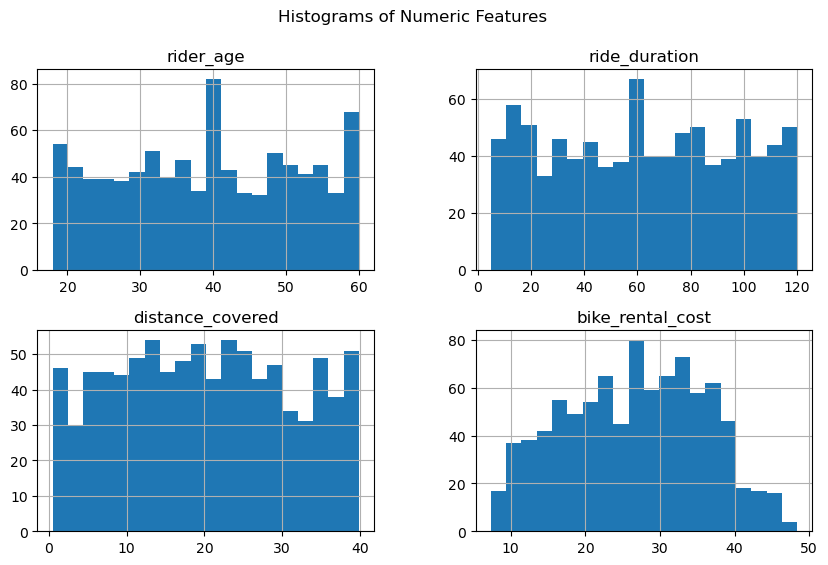

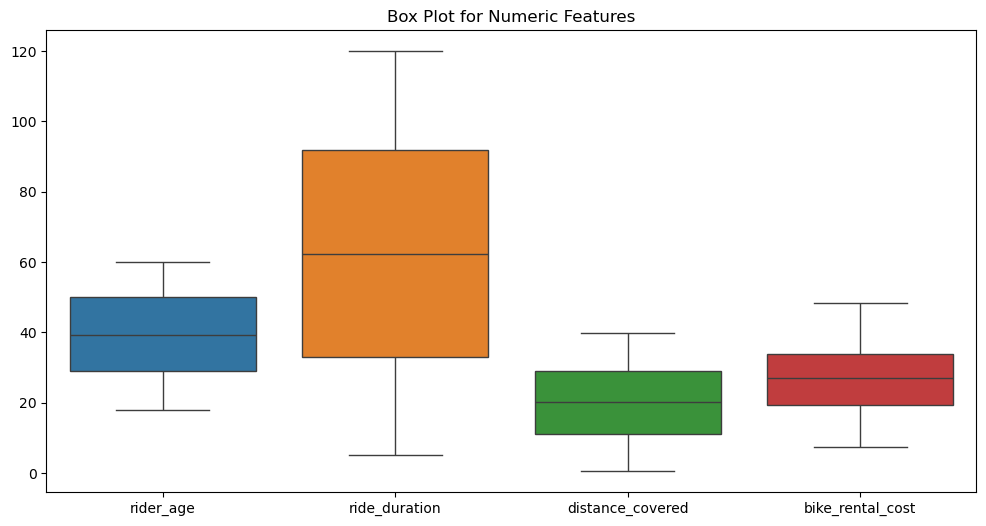

In [14]:
df[['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']].hist(bins=20, figsize=(10, 6))
plt.suptitle("Histograms of Numeric Features")
plt.savefig("histograms_numeric_features.png", dpi=300, bbox_inches="tight")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']])
plt.title("Box Plot for Numeric Features")
plt.savefig("box_plot_numeric_features.png", dpi=300, bbox_inches="tight")
plt.show()

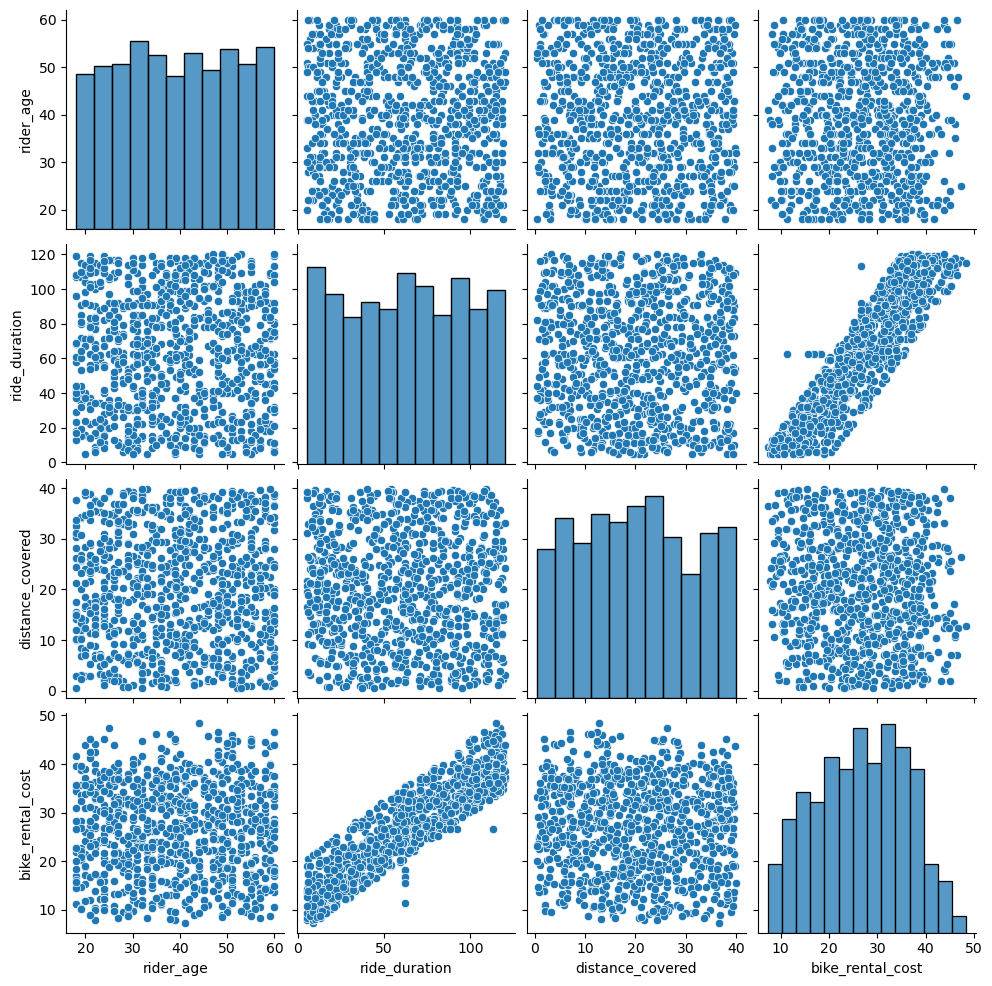

In [15]:
sns.pairplot(df[['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']])
plt.savefig("pair_plot_numeric_features.png", dpi=300, bbox_inches="tight")
plt.show()

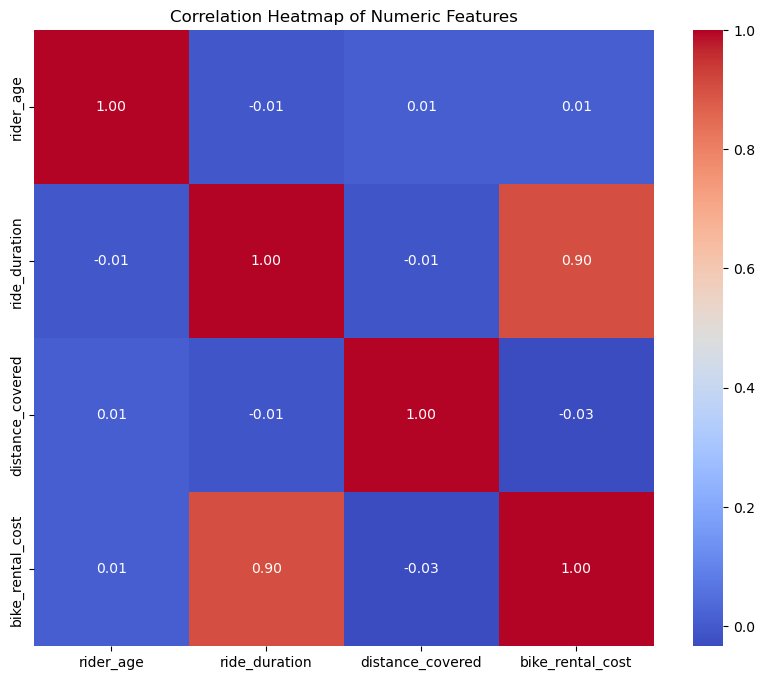

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [17]:
numeric_summary = df[['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']].describe()
print("Descriptive Statistics:")
print(numeric_summary)

from scipy.stats import shapiro

Descriptive Statistics:
        rider_age  ride_duration  distance_covered  bike_rental_cost
count  900.000000     900.000000        900.000000        900.000000
mean    39.264407      62.225479         20.130530         26.581470
std     12.270139      33.710026         11.097657          9.390862
min     18.000000       5.000000          0.510000          7.330000
25%     29.000000      33.000000         11.040000         19.282500
50%     39.264407      62.225479         20.130530         26.970000
75%     50.000000      92.000000         29.027500         33.935000
max     60.000000     120.000000         39.870000         48.380000


In [18]:
print("Columns in df:")
print(df.columns)

Columns in df:
Index(['city', 'weather_condition', 'rider_age', 'bike_model', 'ride_duration',
       'distance_covered', 'rider_satisfaction', 'bike_rental_cost'],
      dtype='object')


In [19]:
print("Columns in df_encoded:")
print(df_encoded.columns)

Columns in df_encoded:
Index(['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost',
       'city_Berlin', 'city_Chicago', 'city_Dublin', 'city_London',
       'city_New York', 'city_San Francisco', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'bike_model_Electric', 'bike_model_Manual',
       'bike_model_Mountain', 'bike_model_Standard', 'rider_satisfaction_High',
       'rider_satisfaction_Low', 'rider_satisfaction_Medium'],
      dtype='object')


In [20]:
import numpy as np
from scipy.stats import norm

sunny_duration = df[df['weather_condition'] == 'Sunny']['ride_duration']
rainy_duration = df[df['weather_condition'] == 'Rainy']['ride_duration']

mean_sunny = np.mean(sunny_duration)
mean_rainy = np.mean(rainy_duration)
se_sunny = np.std(sunny_duration, ddof=1) / np.sqrt(len(sunny_duration))
se_rainy = np.std(rainy_duration, ddof=1) / np.sqrt(len(rainy_duration))

ci_sunny = norm.interval(0.95, loc=mean_sunny, scale=se_sunny)
ci_rainy = norm.interval(0.95, loc=mean_rainy, scale=se_rainy)

print(f"Sunny Ride Duration: Mean={mean_sunny:.2f}, 95% CI={ci_sunny}")
print(f"Rainy Ride Duration: Mean={mean_rainy:.2f}, 95% CI={ci_rainy}")

Sunny Ride Duration: Mean=61.92, 95% CI=(57.395781352137874, 66.43559099591992)
Rainy Ride Duration: Mean=59.36, 95% CI=(55.28213268749353, 63.439374147343)


In [21]:
from scipy.stats import ttest_ind

sunny_duration = df[df['weather_condition'] == 'Sunny']['ride_duration']
rainy_duration = df[df['weather_condition'] == 'Rainy']['ride_duration']

stat, p_value = ttest_ind(sunny_duration, rainy_duration, equal_var=False)

print(f"T-Test: Statistics={stat}, p-value={p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in ride duration between Sunny and Rainy conditions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride duration between Sunny and Rainy conditions.")


T-Test: Statistics=0.8225217653113279, p-value=0.41120680328932335
Fail to reject the null hypothesis: No significant difference in ride duration between Sunny and Rainy conditions.


In [22]:
print("Descriptive Statistics for Sunny Rides:")
print(sunny_duration.describe())
print("\nDescriptive Statistics for Rainy Rides:")
print(rainy_duration.describe())

Descriptive Statistics for Sunny Rides:
count    220.000000
mean      61.915686
std       34.205232
min        5.000000
25%       31.000000
50%       65.500000
75%       92.000000
max      118.000000
Name: ride_duration, dtype: float64

Descriptive Statistics for Rainy Rides:
count    256.000000
mean      59.360753
std       33.295475
min        5.000000
25%       29.750000
50%       59.500000
75%       88.000000
max      119.000000
Name: ride_duration, dtype: float64


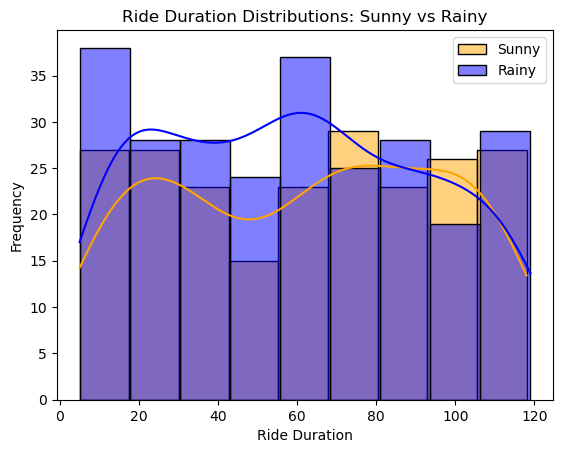

In [23]:
sns.histplot(sunny_duration, color='orange', label='Sunny', kde=True)
sns.histplot(rainy_duration, color='blue', label='Rainy', kde=True)
plt.legend()
plt.title('Ride Duration Distributions: Sunny vs Rainy')
plt.xlabel('Ride Duration')
plt.ylabel('Frequency')
plt.savefig("ride_duration_sunny_vs_rainy.png", dpi=300, bbox_inches="tight")
plt.show()

In [24]:
import statsmodels.api as sm

X = df[['ride_duration']]
y = df['bike_rental_cost']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary()) # removed second model for simplicity

                            OLS Regression Results                            
Dep. Variable:       bike_rental_cost   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     4058.
Date:                Sat, 04 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:44:51   Log-Likelihood:                -2523.7
No. Observations:                 900   AIC:                             5051.
Df Residuals:                     898   BIC:                             5061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8959      0.280     38.911

In [25]:
print(X.dtypes)
print(y.dtypes)

const            float64
ride_duration    float64
dtype: object
float64


In [26]:
fitted_values = model.fittedvalues
residuals = model.resid

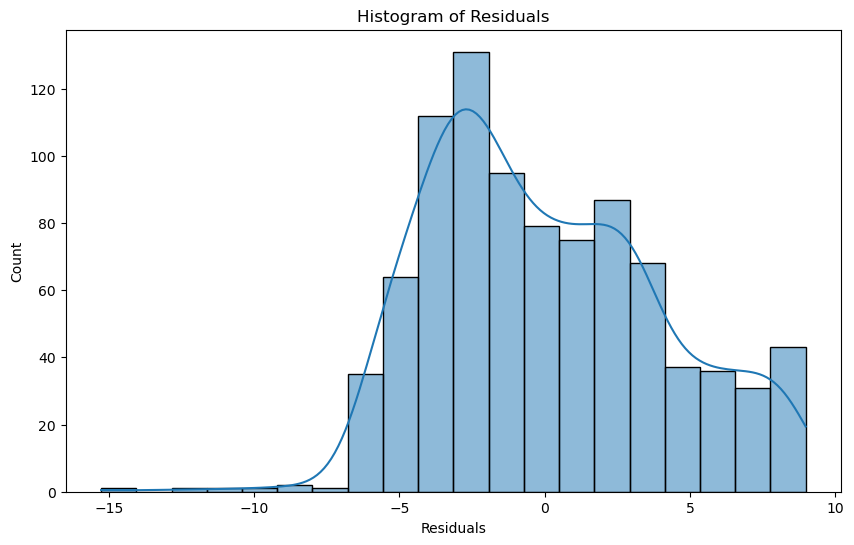

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.savefig("residuals_histogram_first_model.png", dpi=300, bbox_inches="tight")
plt.show()

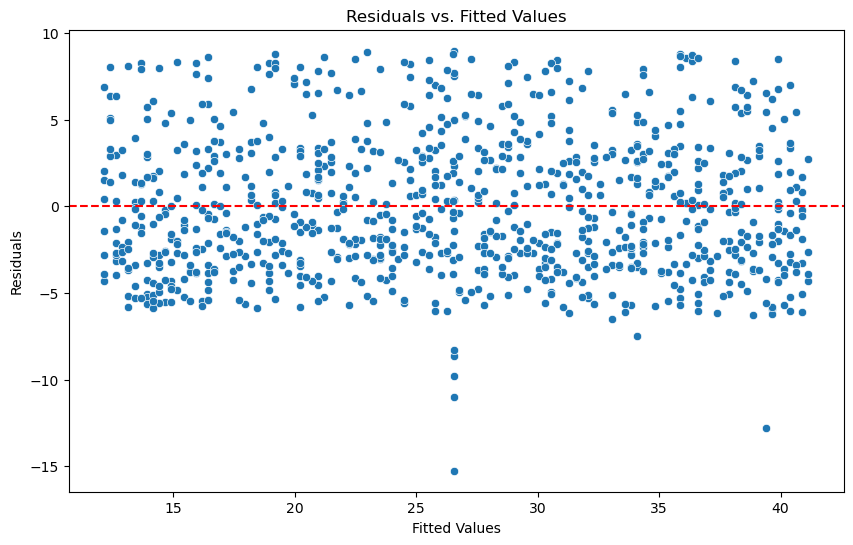

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.savefig("residuals_vs_fitted_first_model.png", dpi=300, bbox_inches="tight")
plt.show()

In [29]:
df['residuals'] = residuals

extreme_residuals = df.loc[residuals.abs().sort_values(ascending=False).index]

print("Top 5 rows with extreme residuals:")
print(extreme_residuals[['ride_duration', 'bike_rental_cost', 'residuals']].head())

Top 5 rows with extreme residuals:
     ride_duration  bike_rental_cost  residuals
159      62.225479          11.32000 -15.261470
630     113.000000          26.58147 -12.799078
664      62.225479          15.55000 -11.031470
607      62.225479          16.81000  -9.771470
295      62.225479          35.56000   8.978530


In [30]:
zero_duration_rows = df[df['ride_duration'] == 0]

print("Rows with ride_duration = 0:")
print(zero_duration_rows[['ride_duration', 'distance_covered', 'bike_rental_cost', 'residuals']])

Rows with ride_duration = 0:
Empty DataFrame
Columns: [ride_duration, distance_covered, bike_rental_cost, residuals]
Index: []


In [31]:
numeric_columns = ['ride_duration', 'distance_covered', 'bike_rental_cost', 'rider_age']
df_numeric = df[numeric_columns]

encoded_columns = [
    col for col in df_encoded.columns 
    if col not in numeric_columns and col not in ['city', 'weather_condition', 'bike_model_label']
]
df_categorical_encoded = df_encoded[encoded_columns]

df_combined = pd.concat([df_numeric, df_categorical_encoded], axis=1)

print(df_combined.head())

   ride_duration  distance_covered  bike_rental_cost  rider_age  city_Berlin  \
0           62.0              2.25             22.63       53.0         True   
1            5.0             21.67              7.87       39.0        False   
2          106.0             28.40             39.40       43.0         True   
3          119.0              5.66             37.63       24.0        False   
4           11.0             25.74             13.12       24.0        False   

   city_Chicago  city_Dublin  city_London  city_New York  city_San Francisco  \
0         False        False        False          False               False   
1         False        False        False          False                True   
2         False        False        False          False               False   
3         False        False        False          False                True   
4         False        False        False           True               False   

   ...  weather_condition_Rainy  weath

In [32]:
df_combined= df_combined[df_combined['ride_duration'] != 0] 

In [33]:
print(df_combined.columns)

Index(['ride_duration', 'distance_covered', 'bike_rental_cost', 'rider_age',
       'city_Berlin', 'city_Chicago', 'city_Dublin', 'city_London',
       'city_New York', 'city_San Francisco', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'bike_model_Electric', 'bike_model_Manual',
       'bike_model_Mountain', 'bike_model_Standard', 'rider_satisfaction_High',
       'rider_satisfaction_Low', 'rider_satisfaction_Medium'],
      dtype='object')


In [34]:
X_numeric = df_combined[['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost']]

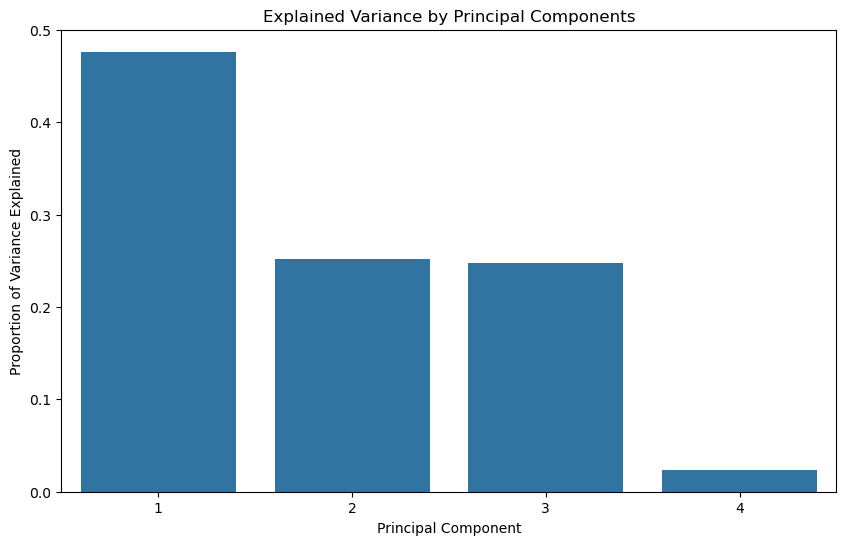

Cumulative Explained Variance (Scaled): [0.47650571 0.72847733 0.97633736 1.        ]


In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
sns.barplot(x=list(range(1, len(explained_variance)+1)), y=explained_variance)
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.savefig("pca_explained_variance_scaled.png", dpi=300, bbox_inches="tight")
plt.show()

cumulative_variance = explained_variance.cumsum()
print("Cumulative Explained Variance (Scaled):", cumulative_variance)

In [36]:
print("Columns in the dataset:")
print(df_combined.columns)

Columns in the dataset:
Index(['ride_duration', 'distance_covered', 'bike_rental_cost', 'rider_age',
       'city_Berlin', 'city_Chicago', 'city_Dublin', 'city_London',
       'city_New York', 'city_San Francisco', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'bike_model_Electric', 'bike_model_Manual',
       'bike_model_Mountain', 'bike_model_Standard', 'rider_satisfaction_High',
       'rider_satisfaction_Low', 'rider_satisfaction_Medium'],
      dtype='object')


In [37]:
pca_loadings = pd.DataFrame(pca.components_, columns=numeric_columns, index=[f"PC{i+1}" for i in range(len(explained_variance))])
print(pca_loadings)

     ride_duration  distance_covered  bike_rental_cost  rider_age
PC1       0.000438          0.706441         -0.035634   0.706874
PC2      -0.730433         -0.017268         -0.682562  -0.016698
PC3       0.682809         -0.034950         -0.729757  -0.002283
PC4       0.015482          0.706697         -0.017147  -0.707139


In [38]:
X_reduced = X_pca[:, :3]  

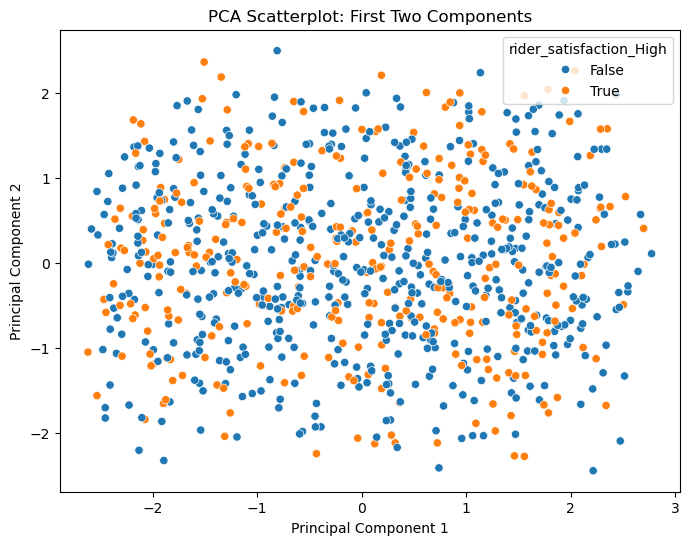

In [39]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=df_combined['rider_satisfaction_High'])
plt.title("PCA Scatterplot: First Two Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.savefig("pca_scatterplot.png", dpi=300, bbox_inches="tight")
plt.show()

In [40]:
print(df.columns)

Index(['city', 'weather_condition', 'rider_age', 'bike_model', 'ride_duration',
       'distance_covered', 'rider_satisfaction', 'bike_rental_cost',
       'residuals'],
      dtype='object')


In [41]:
print (df.columns)

Index(['city', 'weather_condition', 'rider_age', 'bike_model', 'ride_duration',
       'distance_covered', 'rider_satisfaction', 'bike_rental_cost',
       'residuals'],
      dtype='object')


In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

numeric_columns = ['ride_duration', 'distance_covered', 'bike_rental_cost', 'rider_age']
X_lda = df_combined[numeric_columns]

label_encoder = LabelEncoder()
y_lda = label_encoder.fit_transform(df_combined['rider_satisfaction_High'])  

imputer = SimpleImputer(strategy="mean")
X_lda = imputer.fit_transform(X_lda)

lda = LinearDiscriminantAnalysis()
X_lda_transformed = lda.fit_transform(X_lda, y_lda)

print(f"Explained Variance Ratio: {lda.explained_variance_ratio_}")

Explained Variance Ratio: [1.]


In [43]:
print(f"Number of unique classes in target variable: {len(set(y_lda))}")
print(f"Unique classes: {set(y_lda)}")

Number of unique classes in target variable: 2
Unique classes: {0, 1}


In [44]:
df = df[df['bike_model'] != 'Manual']
df.reset_index(drop=True, inplace=True)

print("Rows with 'Manual' bike model dropped from df.")
print("Updated bike_model counts in df:")
print(df['bike_model'].value_counts())

Rows with 'Manual' bike model dropped from df.
Updated bike_model counts in df:
bike_model
Mountain    308
Standard    297
Electric    294
Name: count, dtype: int64


In [45]:
print(df_encoded.columns)

Index(['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost',
       'city_Berlin', 'city_Chicago', 'city_Dublin', 'city_London',
       'city_New York', 'city_San Francisco', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'bike_model_Electric', 'bike_model_Manual',
       'bike_model_Mountain', 'bike_model_Standard', 'rider_satisfaction_High',
       'rider_satisfaction_Low', 'rider_satisfaction_Medium'],
      dtype='object')


In [46]:
df_encoded = df_encoded.drop(columns=['bike_model_Manual'])

print("Updated columns in df_encoded:")
print(df_encoded.columns)

Updated columns in df_encoded:
Index(['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost',
       'city_Berlin', 'city_Chicago', 'city_Dublin', 'city_London',
       'city_New York', 'city_San Francisco', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'bike_model_Electric', 'bike_model_Mountain',
       'bike_model_Standard', 'rider_satisfaction_High',
       'rider_satisfaction_Low', 'rider_satisfaction_Medium'],
      dtype='object')


In [47]:
print("Number of features (n_features):", X_lda.shape[1])

Number of features (n_features): 4


In [48]:
print("Number of classes (n_classes):", len(label_encoder.classes_))

Number of classes (n_classes): 2


In [49]:
print(df_encoded.columns)

Index(['rider_age', 'ride_duration', 'distance_covered', 'bike_rental_cost',
       'city_Berlin', 'city_Chicago', 'city_Dublin', 'city_London',
       'city_New York', 'city_San Francisco', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'bike_model_Electric', 'bike_model_Mountain',
       'bike_model_Standard', 'rider_satisfaction_High',
       'rider_satisfaction_Low', 'rider_satisfaction_Medium'],
      dtype='object')


In [50]:
print(df_combined[df_combined['bike_model_Mountain'] == 1])

     ride_duration  distance_covered  bike_rental_cost  rider_age  \
4             11.0          25.74000             13.12       24.0   
5             92.0          19.34000             30.61       25.0   
6             73.0          39.50000             31.23       43.0   
8             96.0          26.47000             36.27       41.0   
10            36.0          39.23000             19.50       25.0   
..             ...               ...               ...        ...   
892           31.0          24.51000             17.92       60.0   
894           98.0          20.13053             38.59       56.0   
896           14.0          11.99000             13.78       47.0   
897           23.0           2.78000             20.47       49.0   
898          110.0           2.27000             39.62       19.0   

     city_Berlin  city_Chicago  city_Dublin  city_London  city_New York  \
4          False         False        False        False           True   
5           True     

In [51]:
df_encoded = pd.get_dummies(df, columns=['bike_model'], drop_first=False)
print(df_encoded.columns)

Index(['city', 'weather_condition', 'rider_age', 'ride_duration',
       'distance_covered', 'rider_satisfaction', 'bike_rental_cost',
       'residuals', 'bike_model_Electric', 'bike_model_Mountain',
       'bike_model_Standard'],
      dtype='object')


In [52]:
print(df_encoded['bike_model_Mountain'].sum())

308


In [53]:
print(df.loc[297, 'bike_model'])

Mountain


In [54]:
df = df[df['bike_model'] != 'Manual']

df.reset_index(drop=True, inplace=True)

print("Rows with 'Manual' bike model removed.")
print(df['bike_model'].value_counts())  

Rows with 'Manual' bike model removed.
bike_model
Mountain    308
Standard    297
Electric    294
Name: count, dtype: int64


In [55]:
df_encoded = pd.get_dummies(df, columns=['bike_model'], drop_first=False)

print(df_encoded[['bike_model_Electric', 'bike_model_Mountain', 'bike_model_Standard']].sum())

bike_model_Electric    294
bike_model_Mountain    308
bike_model_Standard    297
dtype: int64


In [56]:
def get_bike_model(row):
    if row['bike_model_Standard'] == 1:
        return 'Standard'
    elif row['bike_model_Electric'] == 1:
        return 'Electric'
    elif row['bike_model_Mountain'] == 1:
        return 'Mountain'
    else:
        return 'Not Specified'

df_encoded['bike_model_label'] = df_encoded.apply(get_bike_model, axis=1)

print(df_encoded['bike_model_label'].value_counts())

bike_model_label
Mountain    308
Standard    297
Electric    294
Name: count, dtype: int64


In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['bike_model_encoded'] = label_encoder.fit_transform(df_encoded['bike_model_label'])

print("Classes and Encoded Labels:")
for i, category in enumerate(label_encoder.classes_):
    print(f"{i}: {category}")

Classes and Encoded Labels:
0: Electric
1: Mountain
2: Standard


In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

numeric_columns = ['ride_duration', 'distance_covered', 'bike_rental_cost', 'rider_age']
X_lda = df_encoded[numeric_columns]
y_lda = df_encoded['bike_model_encoded']

n_classes = len(np.unique(y_lda))
max_components = min(X_lda.shape[1], n_classes - 1)

print(f"Effective classes: {n_classes}")
print(f"Maximum allowable components for LDA: {max_components}")

lda = LinearDiscriminantAnalysis(n_components=max_components)
X_lda_transformed = lda.fit_transform(X_lda, y_lda)

print("Shape of LDA-transformed data:", X_lda_transformed.shape)

Effective classes: 3
Maximum allowable components for LDA: 2
Shape of LDA-transformed data: (899, 2)


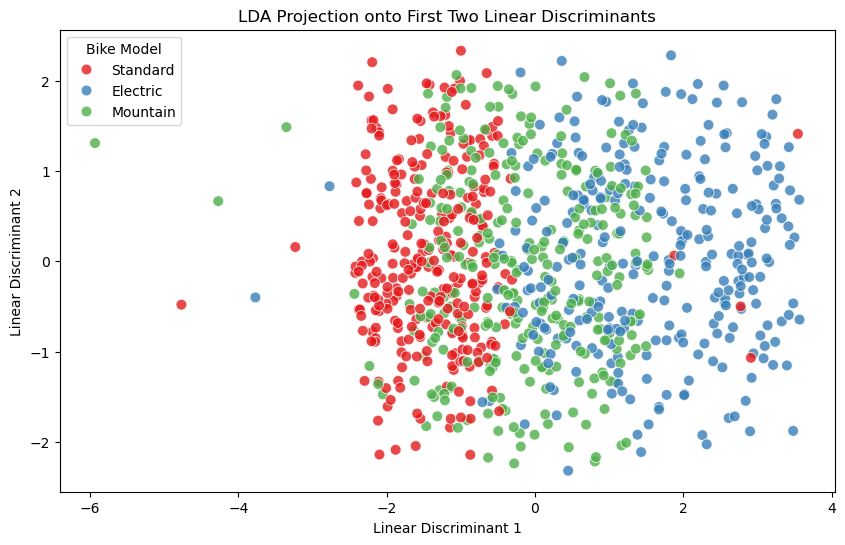

In [59]:
lda_df = pd.DataFrame(X_lda_transformed, columns=[f'LD{i+1}' for i in range(X_lda_transformed.shape[1])])
lda_df['bike_model'] = df_encoded['bike_model_label']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_df, x='LD1', y='LD2', hue='bike_model', palette='Set1', s=60, alpha=0.8)
plt.title("LDA Projection onto First Two Linear Discriminants")
plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.legend(title='Bike Model')
plt.savefig("lda_projection_bike_model.png", dpi=300, bbox_inches="tight")
plt.show()

In [60]:
outliers = lda_df[abs(lda_df['LD1']) > 4]  
print(outliers)

          LD1       LD2 bike_model
159 -5.934334  1.308192   Mountain
629 -4.769003 -0.481130   Standard
663 -4.271974  0.664924   Mountain


In [61]:
outlier_indices = [159, 629, 663]
print(df.loc[outlier_indices])

              city weather_condition  rider_age bike_model  ride_duration  \
159        Chicago            Cloudy       56.0   Mountain      62.225479   
629  San Francisco             Snowy       43.0   Standard     113.000000   
663       New York             Rainy       48.0   Mountain      62.225479   

     distance_covered rider_satisfaction  bike_rental_cost  residuals  
159              4.95             Medium          11.32000 -15.261470  
629             27.45               High          26.58147 -12.799078  
663             18.91             Medium          15.55000 -11.031470  


In [62]:
print(df[['ride_duration', 'distance_covered', 'bike_rental_cost', 'rider_age']].describe())

print(df.loc[outlier_indices, ['ride_duration', 'distance_covered', 'bike_rental_cost', 'rider_age']])

       ride_duration  distance_covered  bike_rental_cost   rider_age
count     899.000000        899.000000        899.000000  899.000000
mean       62.165663         20.121420         26.567979   39.264701
std        33.680967         11.100467          9.387358   12.276966
min         5.000000          0.510000          7.330000   18.000000
25%        33.000000         11.030000         19.275000   29.000000
50%        62.225479         20.130530         26.970000   39.264407
75%        91.500000         29.055000         33.925000   50.000000
max       120.000000         39.870000         48.380000   60.000000
     ride_duration  distance_covered  bike_rental_cost  rider_age
159      62.225479              4.95          11.32000       56.0
629     113.000000             27.45          26.58147       43.0
663      62.225479             18.91          15.55000       48.0


In [63]:
from scipy.stats import norm

electric_bikes = df_combined[df_combined['bike_model_Electric'] == 1]['bike_rental_cost']
standard_bikes = df_combined[df_combined['bike_model_Standard'] == 1]['bike_rental_cost']

def calculate_confidence_interval(data, confidence=0.95):
    mean = np.mean(data)
    se = np.std(data, ddof=1) / np.sqrt(len(data))  
    margin = norm.ppf((1 + confidence) / 2) * se  
    return mean, (mean - margin, mean + margin)

mean_electric, ci_electric = calculate_confidence_interval(electric_bikes)
mean_standard, ci_standard = calculate_confidence_interval(standard_bikes)

print(f"Electric Bikes: Mean = {mean_electric:.2f}, 95% CI = {ci_electric}")
print(f"Standard Bikes: Mean = {mean_standard:.2f}, 95% CI = {ci_standard}")

Electric Bikes: Mean = 31.00, 95% CI = (30.02642412238197, 31.970952821661644)
Standard Bikes: Mean = 22.17, 95% CI = (21.154981376543923, 23.193745095055725)


In [64]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(electric_bikes, standard_bikes, equal_var=False)  

print(f"T-Test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in rental cost between Electric and Standard bikes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rental cost between Electric and Standard bikes.")

T-Test: t-statistic = 12.28, p-value = 0.0000
Reject the null hypothesis: Significant difference in rental cost between Electric and Standard bikes.


In [65]:
print(df_combined.columns)

Index(['ride_duration', 'distance_covered', 'bike_rental_cost', 'rider_age',
       'city_Berlin', 'city_Chicago', 'city_Dublin', 'city_London',
       'city_New York', 'city_San Francisco', 'weather_condition_Cloudy',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny', 'bike_model_Electric', 'bike_model_Manual',
       'bike_model_Mountain', 'bike_model_Standard', 'rider_satisfaction_High',
       'rider_satisfaction_Low', 'rider_satisfaction_Medium'],
      dtype='object')


In [66]:
print("Summary statistics for 'rider_satisfaction':")
print(df['rider_satisfaction'].describe())

print("\nUnique values in 'rider_satisfaction':")
print(df['rider_satisfaction'].unique())

print("\nNumber of missing values in 'rider_satisfaction':")
print(df['rider_satisfaction'].isnull().sum())

print("\nSample values from 'rider_satisfaction':")
print(df['rider_satisfaction'].head())

Summary statistics for 'rider_satisfaction':
count      899
unique       3
top       High
freq       329
Name: rider_satisfaction, dtype: object

Unique values in 'rider_satisfaction':
['High' 'Medium' 'Low']

Number of missing values in 'rider_satisfaction':
0

Sample values from 'rider_satisfaction':
0      High
1    Medium
2      High
3       Low
4       Low
Name: rider_satisfaction, dtype: object


In [67]:
satisfaction_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
df['satisfaction_numeric'] = df['rider_satisfaction'].map(satisfaction_mapping)

In [68]:
high_satisfaction = df[df['rider_satisfaction'] == 'High']['ride_duration']
medium_satisfaction = df[df['rider_satisfaction'] == 'Medium']['ride_duration']
low_satisfaction = df[df['rider_satisfaction'] == 'Low']['ride_duration']

In [69]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(low_satisfaction, medium_satisfaction, high_satisfaction)
print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in ride duration across satisfaction levels.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride duration across satisfaction levels.")

ANOVA: F-statistic = 0.06, p-value = 0.9448
Fail to reject the null hypothesis: No significant difference in ride duration across satisfaction levels.


In [70]:
from scipy.stats import kruskal

high_costs = df[df['rider_satisfaction'] == 'High']['bike_rental_cost']
medium_costs = df[df['rider_satisfaction'] == 'Medium']['bike_rental_cost']
low_costs = df_encoded[df_encoded['rider_satisfaction'] == 'Low']['bike_rental_cost']

h_stat, p_value = kruskal(high_costs, medium_costs, low_costs)
print(f"Kruskal-Wallis Test: H-statistic = {h_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in rental costs across satisfaction levels.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rental costs across satisfaction levels.")

Kruskal-Wallis Test: H-statistic = 0.13, p-value = 0.9379
Fail to reject the null hypothesis: No significant difference in rental costs across satisfaction levels.


In [71]:
df_encoded = pd.get_dummies(df_encoded, columns=['rider_satisfaction'], drop_first=True)

In [72]:
print(df_encoded.columns)

Index(['city', 'weather_condition', 'rider_age', 'ride_duration',
       'distance_covered', 'bike_rental_cost', 'residuals',
       'bike_model_Electric', 'bike_model_Mountain', 'bike_model_Standard',
       'bike_model_label', 'bike_model_encoded', 'rider_satisfaction_Low',
       'rider_satisfaction_Medium'],
      dtype='object')


In [73]:
df_encoded['rider_satisfaction'] = (
    df_encoded[['rider_satisfaction_Low', 'rider_satisfaction_Medium']]
    .idxmax(axis=1)
    .str.replace('rider_satisfaction_', '')
)

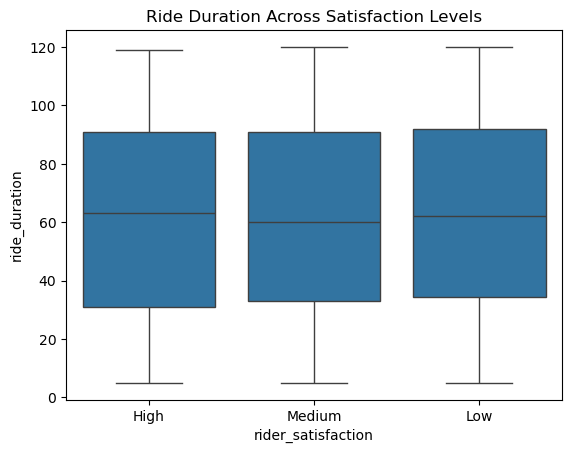

In [74]:
low_satisfaction = df_encoded[df_encoded['rider_satisfaction_Low'] == 1]
medium_satisfaction = df_encoded[df_encoded['rider_satisfaction_Medium'] == 1]
high_satisfaction = df_encoded[
    (df_encoded['rider_satisfaction_Low'] == 0) & (df_encoded['rider_satisfaction_Medium'] == 0)
]

df_encoded['rider_satisfaction'] = df_encoded[['rider_satisfaction_Low', 'rider_satisfaction_Medium']].apply(
    lambda row: 'Low' if row['rider_satisfaction_Low'] == 1 else 
                'Medium' if row['rider_satisfaction_Medium'] == 1 else 
                'High',
    axis=1
)

sns.boxplot(x='rider_satisfaction', y='ride_duration', data=df_encoded)
plt.title('Ride Duration Across Satisfaction Levels')
plt.savefig("ride_duration_satisfaction_levels.png", dpi=300, bbox_inches="tight")
plt.show()

In [75]:
print(df_encoded.columns)

Index(['city', 'weather_condition', 'rider_age', 'ride_duration',
       'distance_covered', 'bike_rental_cost', 'residuals',
       'bike_model_Electric', 'bike_model_Mountain', 'bike_model_Standard',
       'bike_model_label', 'bike_model_encoded', 'rider_satisfaction_Low',
       'rider_satisfaction_Medium', 'rider_satisfaction'],
      dtype='object')


In [76]:
from scipy.stats import f_oneway
low_satisfaction = df[df['rider_satisfaction'] == 'Low']['distance_covered']
medium_satisfaction = df[df['rider_satisfaction'] == 'Medium']['distance_covered']
high_satisfaction = df[df['rider_satisfaction'] == 'High']['distance_covered']

f_stat, p_value = f_oneway(low_satisfaction, medium_satisfaction, high_satisfaction)

print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in distance covered across satisfaction levels.")
else:
    print("Fail to reject the null hypothesis: No significant difference in distance covered across satisfaction levels.")

ANOVA: F-statistic = 0.05, p-value = 0.9526
Fail to reject the null hypothesis: No significant difference in distance covered across satisfaction levels.


In [77]:
rainy_rental_cost = df[df['weather_condition'] == 'Rainy']['bike_rental_cost']
snowy_rental_cost = df[df['weather_condition'] == 'Snowy']['bike_rental_cost']
sunny_rental_cost = df[df['weather_condition'] == 'Sunny']['bike_rental_cost']

f_stat, p_value = f_oneway(rainy_rental_cost, snowy_rental_cost, sunny_rental_cost)

print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in rental cost across weather conditions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in rental cost across weather conditions.")



ANOVA: F-statistic = 2.25, p-value = 0.1064
Fail to reject the null hypothesis: No significant difference in rental cost across weather conditions.


In [78]:
electric_duration = df_combined[df_combined['bike_model_Electric'] == 1]['ride_duration']
standard_duration = df_combined[df_combined['bike_model_Standard'] == 1]['ride_duration']
mountain_duration = df_combined[df_combined['bike_model_Mountain'] == 1]['ride_duration']

f_stat, p_value = f_oneway(electric_duration, standard_duration, mountain_duration)

print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in ride duration across bike models.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride duration across bike models.")

ANOVA: F-statistic = 2.26, p-value = 0.1047
Fail to reject the null hypothesis: No significant difference in ride duration across bike models.


In [79]:
electric_distance = df_combined[df_combined['bike_model_Electric'] == 1]['distance_covered']
standard_distance = df_combined[df_combined['bike_model_Standard'] == 1]['distance_covered']

t_stat, p_value = ttest_ind(electric_distance, standard_distance, equal_var=False)  
print(f"T-Test: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in distance covered between Electric and Standard bikes.")
else:
    print("Fail to reject the null hypothesis: No significant difference in distance covered between Electric and Standard bikes.")

T-Test: t-statistic = -0.79, p-value = 0.4321
Fail to reject the null hypothesis: No significant difference in distance covered between Electric and Standard bikes.


In [80]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_encoded['bike_model_label'], df_encoded['rider_satisfaction'])
print("Contingency Table:")
print(contingency_table)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-Square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value:.4f}")
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

if p_value < 0.05:
    print("\nReject the null hypothesis: There is a significant association between bike type and satisfaction levels.")
else:
    print("\nFail to reject the null hypothesis: No significant association between bike type and satisfaction levels.")

Contingency Table:
rider_satisfaction  High  Low  Medium
bike_model_label                     
Electric             117   86      91
Mountain             110   99      99
Standard             102   86     109

Chi-Square Statistic: 3.5679
Degrees of Freedom: 4
P-Value: 0.4676

Expected Frequencies:
rider_satisfaction        High        Low      Medium
bike_model_label                                     
Electric            107.592881  88.625139   97.781980
Mountain            112.716352  92.845384  102.438265
Standard            108.690768  89.529477   98.779755

Fail to reject the null hypothesis: No significant association between bike type and satisfaction levels.


In [81]:
high_cost = df_encoded[df_encoded['rider_satisfaction'] == 'High']['bike_rental_cost']
medium_cost = df_encoded[df_encoded['rider_satisfaction'] == 'Medium']['bike_rental_cost']
low_cost = df_encoded[df_encoded['rider_satisfaction'] == 'Low']['bike_rental_cost']

f_stat, p_value = f_oneway(high_cost, medium_cost, low_cost)

print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in ride cost across satisfaction levels.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride cost across satisfaction levels.")


ANOVA: F-statistic = 0.04, p-value = 0.9623
Fail to reject the null hypothesis: No significant difference in ride cost across satisfaction levels.


In [82]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_encoded['city'], df_encoded['bike_model_label'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("P-Value:", p_value)
print("\nExpected Frequencies:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

if p_value < 0.05:
    print("Reject the null hypothesis: Significant association between city and bike model.")
else:
    print("Fail to reject the null hypothesis: No significant association between city and bike model.")


Contingency Table:
bike_model_label  Electric  Mountain  Standard
city                                          
Berlin                  56        61        53
Chicago                 58        58        52
Dublin                   7        13         9
London                  60        75        61
New York                55        47        66
San Francisco           58        54        56

Chi-Square Statistic: 8.051140015031645
Degrees of Freedom: 10
P-Value: 0.6238415399119739

Expected Frequencies:
bike_model_label   Electric   Mountain   Standard
city                                             
Berlin            55.595106  58.242492  56.162403
Chicago           54.941046  57.557286  55.501669
Dublin             9.483871   9.935484   9.580645
London            64.097887  67.150167  64.751947
New York          54.941046  57.557286  55.501669
San Francisco     54.941046  57.557286  55.501669
Fail to reject the null hypothesis: No significant association between city and bike model

In [83]:
from scipy.stats import f_oneway

city_groups = [group['ride_duration'] for _, group in df_encoded.groupby('city')]

f_stat, p_value = f_oneway(*city_groups)

print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in ride duration across cities.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride duration across cities.")


ANOVA: F-statistic = 0.57, p-value = 0.7242
Fail to reject the null hypothesis: No significant difference in ride duration across cities.


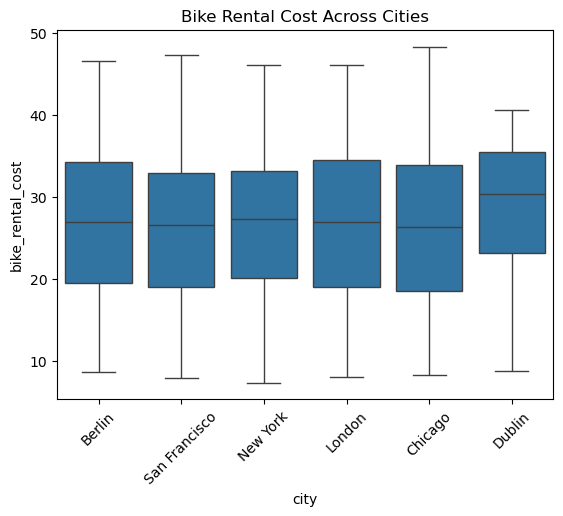

In [84]:
sns.boxplot(x='city', y='bike_rental_cost', data=df_encoded)
plt.title('Bike Rental Cost Across Cities')
plt.xticks(rotation=45)
plt.savefig("bike_rental_cost_cities.png", dpi=300, bbox_inches="tight")
plt.show()

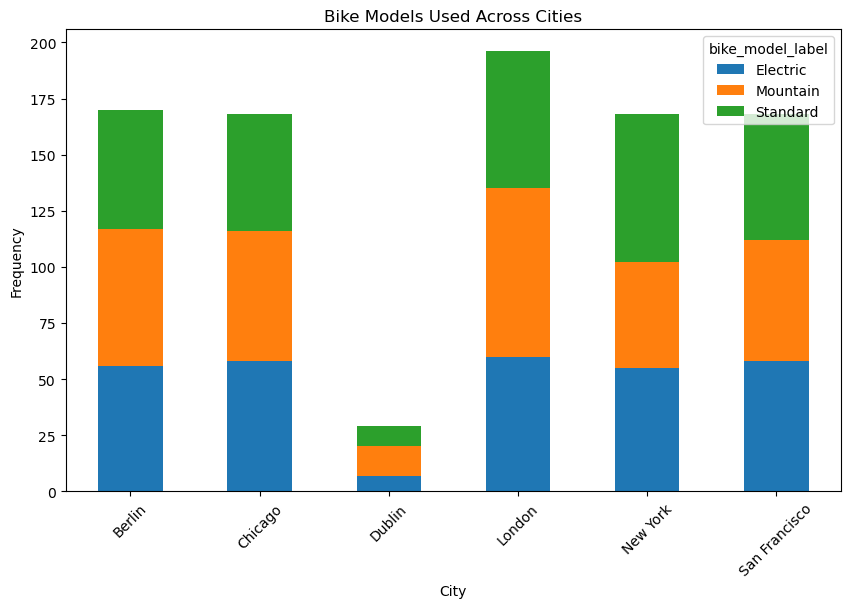

In [85]:
city_bike_model = pd.crosstab(df_encoded['city'], df_encoded['bike_model_label'])
city_bike_model.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Bike Models Used Across Cities')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig("bike_models_cities.png", dpi=300, bbox_inches="tight")
plt.show()

In [86]:
print(df_encoded.columns)

Index(['city', 'weather_condition', 'rider_age', 'ride_duration',
       'distance_covered', 'bike_rental_cost', 'residuals',
       'bike_model_Electric', 'bike_model_Mountain', 'bike_model_Standard',
       'bike_model_label', 'bike_model_encoded', 'rider_satisfaction_Low',
       'rider_satisfaction_Medium', 'rider_satisfaction'],
      dtype='object')


In [87]:
from scipy.stats import f_oneway

rainy_duration = df_encoded[df_encoded['weather_condition'] == 'Rainy']['ride_duration']
snowy_duration = df_encoded[df_encoded['weather_condition'] == 'Snowy']['ride_duration']
sunny_duration = df_encoded[df_encoded['weather_condition'] == 'Sunny']['ride_duration']

f_stat, p_value = f_oneway(rainy_duration, snowy_duration, sunny_duration)

print(f"ANOVA: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}")
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in ride duration across weather conditions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride duration across weather conditions.")

ANOVA: F-statistic = 1.65, p-value = 0.1920
Fail to reject the null hypothesis: No significant difference in ride duration across weather conditions.


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X = df_encoded[['ride_duration', 'distance_covered', 'bike_model_Electric', 
                'bike_model_Mountain', 'bike_model_Standard', 'rider_age']]  
y = df_encoded['bike_rental_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

y_pred = linear_reg_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression Model Performance:")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

cv_score = cross_val_score(linear_reg_model, X, y, cv=5)
print(f"Cross-Validation Score: {cv_score.mean():.4f}")

Linear Regression Model Performance:
Mean Absolute Error: 2.02
Mean Squared Error: 6.39
Root Mean Squared Error: 2.53
Cross-Validation Score: 0.9241


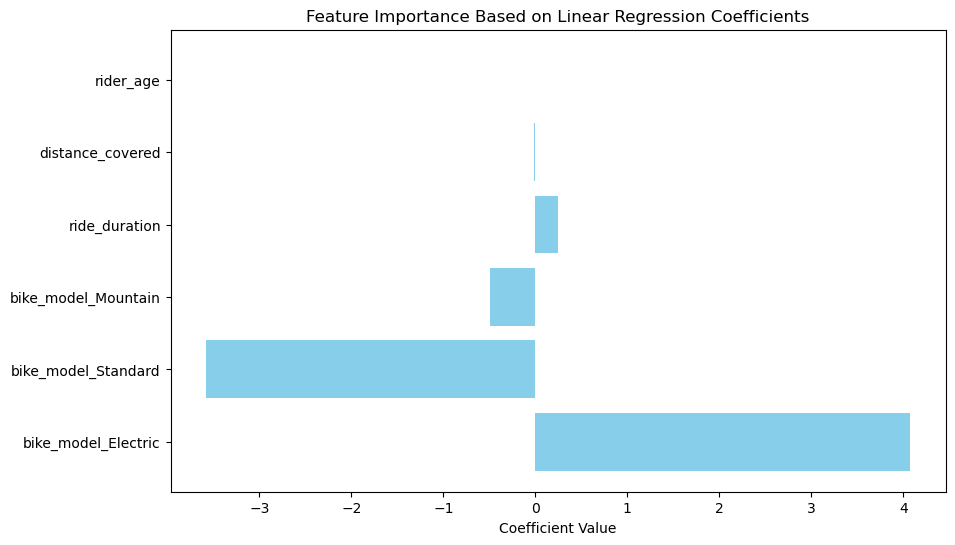

               Feature  Coefficient
2  bike_model_Electric     4.077320
4  bike_model_Standard    -3.583008
3  bike_model_Mountain    -0.494312
0        ride_duration     0.245193
1     distance_covered    -0.011463
5            rider_age    -0.001242


In [89]:
coefficients = linear_reg_model.coef_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance Based on Linear Regression Coefficients')
plt.savefig('feature_importance_plot.png', bbox_inches='tight')  
plt.show()

print(feature_importance_df[['Feature', 'Coefficient']])

In [90]:
from sklearn.linear_model import Ridge, Lasso
X = df_encoded[['ride_duration', 'distance_covered', 'bike_model_Electric', 
                'bike_model_Mountain', 'bike_model_Standard', 'rider_age']]  
y = df_encoded['bike_rental_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)  
lasso_model = Lasso(alpha=0.01)  

linear_reg_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)

y_pred_linear = linear_reg_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

cv_score_linear = cross_val_score(linear_reg_model, X, y, cv=5)
cv_score_ridge = cross_val_score(ridge_model, X, y, cv=5)
cv_score_lasso = cross_val_score(lasso_model, X, y, cv=5)

print(f"Linear Regression Model Performance:")
print(f"MAE: {mae_linear:.2f}, MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}")
print(f"Cross-validation score: {cv_score_linear.mean():.4f}")

print(f"\nRidge Regression Model Performance:")
print(f"MAE: {mae_ridge:.2f}, MSE: {mse_ridge:.2f}, RMSE: {rmse_ridge:.2f}")
print(f"Cross-validation score: {cv_score_ridge.mean():.4f}")

print(f"\nLasso Regression Model Performance:")
print(f"MAE: {mae_lasso:.2f}, MSE: {mse_lasso:.2f}, RMSE: {rmse_lasso:.2f}")
print(f"Cross-validation score: {cv_score_lasso.mean():.4f}")

Linear Regression Model Performance:
MAE: 2.02, MSE: 6.39, RMSE: 2.53
Cross-validation score: 0.9241

Ridge Regression Model Performance:
MAE: 2.02, MSE: 6.38, RMSE: 2.53
Cross-validation score: 0.9241

Lasso Regression Model Performance:
MAE: 2.02, MSE: 6.38, RMSE: 2.52
Cross-validation score: 0.9241


In [91]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

X = df_encoded[['ride_duration', 'distance_covered', 'bike_model_Electric', 
                'bike_model_Mountain', 'bike_model_Standard', 'rider_age']]  
y = df_encoded['bike_rental_cost']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

cv_score_rf = cross_val_score(rf_model, X, y, cv=5)
cv_score_xgb = cross_val_score(xgb_model, X, y, cv=5)

print(f"Random Forest Model Performance:")
print(f"MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}")
print(f"Cross-validation score: {cv_score_rf.mean():.4f}")

print(f"\nXGBoost Model Performance:")
print(f"MAE: {mae_xgb:.2f}, MSE: {mse_xgb:.2f}, RMSE: {rmse_xgb:.2f}")
print(f"Cross-validation score: {cv_score_xgb.mean():.4f}")

Random Forest Model Performance:
MAE: 2.48, MSE: 9.56, RMSE: 3.09
Cross-validation score: 0.9047

XGBoost Model Performance:
MAE: 2.61, MSE: 11.08, RMSE: 3.33
Cross-validation score: 0.8868


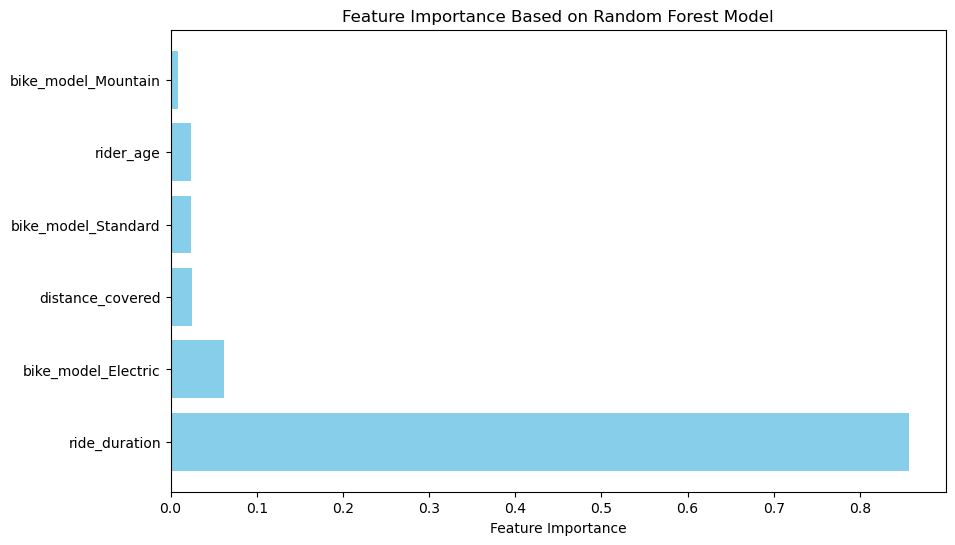

               Feature  Importance
0        ride_duration    0.856690
2  bike_model_Electric    0.062491
1     distance_covered    0.025051
4  bike_model_Standard    0.023964
5            rider_age    0.023719
3  bike_model_Mountain    0.008085


In [92]:
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance Based on Random Forest Model')
plt.savefig('feature_importance_random_forest.png', dpi=300, bbox_inches="tight")
plt.show()

print(feature_importance_df[['Feature', 'Importance']])

In [93]:
y_pred_linear = linear_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

cv_score_linear = cross_val_score(linear_reg_model, X, y, cv=5)
cv_score_rf = cross_val_score(rf_model, X, y, cv=5)

print(f"Linear Regression Performance:")
print(f"MAE: {mae_linear:.2f}, MSE: {mse_linear:.2f}, RMSE: {rmse_linear:.2f}")
print(f"Cross-validation score: {cv_score_linear.mean():.4f}")

print(f"\nRandom Forest Performance:")
print(f"MAE: {mae_rf:.2f}, MSE: {mse_rf:.2f}, RMSE: {rmse_rf:.2f}")
print(f"Cross-validation score: {cv_score_rf.mean():.4f}")

Linear Regression Performance:
MAE: 2.02, MSE: 6.39, RMSE: 2.53
Cross-validation score: 0.9241

Random Forest Performance:
MAE: 2.48, MSE: 9.56, RMSE: 3.09
Cross-validation score: 0.9047


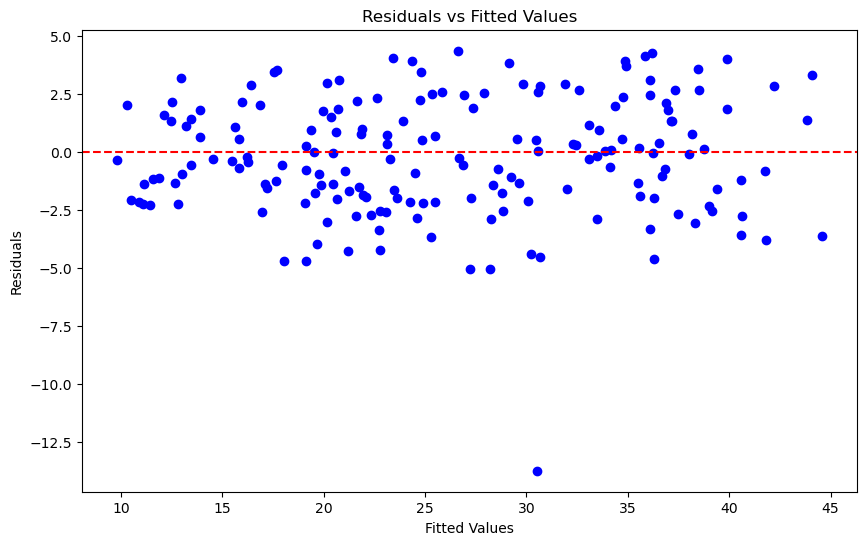

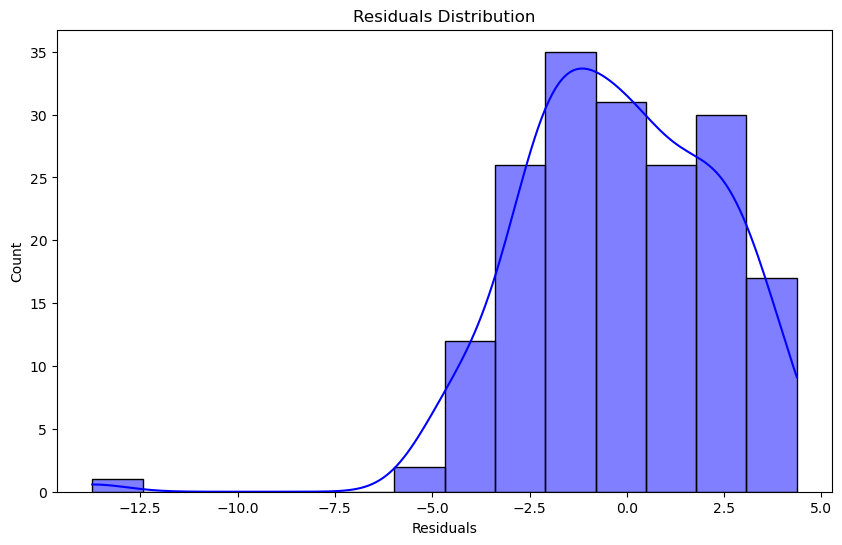

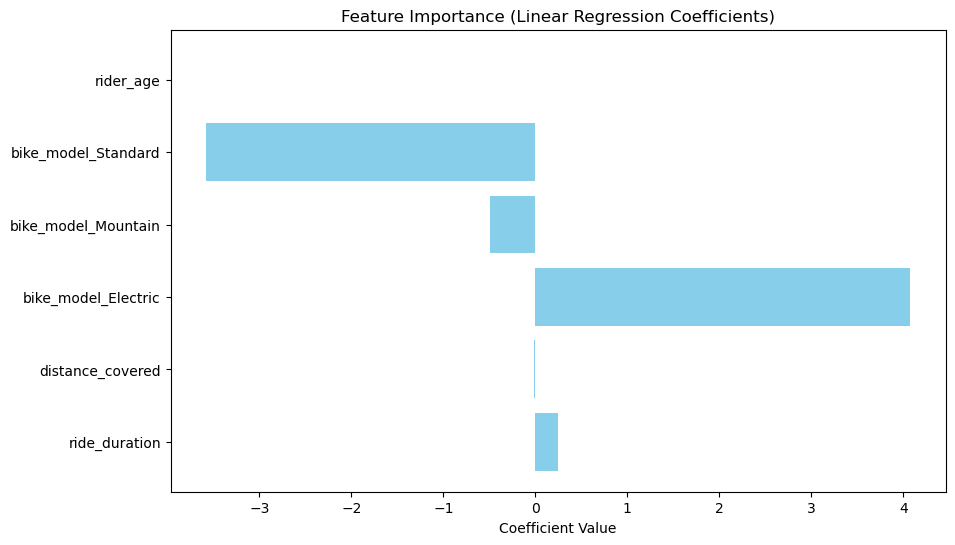

Model saved successfully!


In [94]:
import joblib

y_pred = linear_reg_model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.savefig('final_model_residuals_vs_fitted.png', bbox_inches='tight')  
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.savefig('final_model_residuals_distribution.png', bbox_inches='tight')  
plt.show()

coefficients = linear_reg_model.coef_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.savefig('final_model_feature_importance.png', bbox_inches='tight')  
plt.show()

joblib.dump(linear_reg_model, 'bike_rental_cost_model.pkl')
print("Model saved successfully!")

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [96]:
print(f"Best hyperparameters: {grid_search.best_params_}")

Best hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


In [97]:
best_rf_model = grid_search.best_estimator_

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 2.374521469615172, MSE: 8.838153588452064, RMSE: 2.9729032255443606


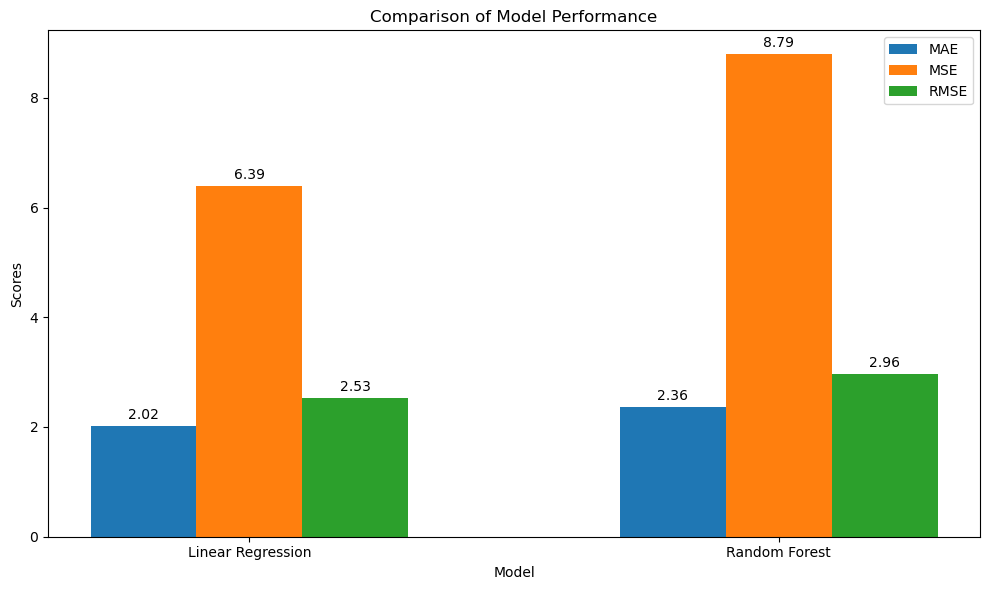

In [98]:
models = ['Linear Regression', 'Random Forest']
mae = [2.02, 2.36]
mse = [6.39, 8.79]
rmse = [2.53, 2.96]
cv_score = [0.9241, 0.9047]


x = np.arange(len(models))  
width = 0.2  

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, mae, width, label='MAE')
rects2 = ax.bar(x, mse, width, label='MSE')
rects3 = ax.bar(x + width, rmse, width, label='RMSE')

ax.set_xlabel('Model')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def add_values(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(rects1)
add_values(rects2)
add_values(rects3)

fig.tight_layout()
fig.savefig('comparison_of_models_performance.png', bbox_inches='tight', dpi=300)
plt.show()

In [99]:
print(df_encoded.columns)

Index(['city', 'weather_condition', 'rider_age', 'ride_duration',
       'distance_covered', 'bike_rental_cost', 'residuals',
       'bike_model_Electric', 'bike_model_Mountain', 'bike_model_Standard',
       'bike_model_label', 'bike_model_encoded', 'rider_satisfaction_Low',
       'rider_satisfaction_Medium', 'rider_satisfaction'],
      dtype='object')


In [100]:
df_encoded['electric_bike_used'] = df_encoded['bike_model_Electric'].apply(lambda x: 1 if x else 0)

print(df_encoded['electric_bike_used'].head())

0    0
1    0
2    1
3    0
4    0
Name: electric_bike_used, dtype: int64


In [101]:
print(df_encoded['electric_bike_used'].dtype)
print(df_encoded['electric_bike_used'].unique())

int64
[0 1]


In [102]:
print(df_encoded['electric_bike_used'].value_counts())
print(df_encoded['electric_bike_used'].dtype)

electric_bike_used
0    605
1    294
Name: count, dtype: int64
int64


In [103]:
print(X.dtypes)

ride_duration          float64
distance_covered       float64
bike_model_Electric       bool
bike_model_Mountain       bool
bike_model_Standard       bool
rider_age              float64
dtype: object


In [104]:
X = X.astype(int)

In [105]:
print(X.isnull().sum())

ride_duration          0
distance_covered       0
bike_model_Electric    0
bike_model_Mountain    0
bike_model_Standard    0
rider_age              0
dtype: int64


In [106]:
print(y.value_counts())

bike_rental_cost
26.58147    9
31.43000    3
15.67000    3
32.75000    3
26.90000    3
           ..
11.97000    1
21.81000    1
22.16000    1
11.44000    1
13.02000    1
Name: count, Length: 786, dtype: int64


In [107]:
print(df_encoded.columns)

Index(['city', 'weather_condition', 'rider_age', 'ride_duration',
       'distance_covered', 'bike_rental_cost', 'residuals',
       'bike_model_Electric', 'bike_model_Mountain', 'bike_model_Standard',
       'bike_model_label', 'bike_model_encoded', 'rider_satisfaction_Low',
       'rider_satisfaction_Medium', 'rider_satisfaction',
       'electric_bike_used'],
      dtype='object')


In [108]:
print(y.value_counts())

bike_rental_cost
26.58147    9
31.43000    3
15.67000    3
32.75000    3
26.90000    3
           ..
11.97000    1
21.81000    1
22.16000    1
11.44000    1
13.02000    1
Name: count, Length: 786, dtype: int64


Accuracy: 0.5389
ROC AUC Score: 0.4772

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.84      0.69       111
           1       0.18      0.06      0.09        69

    accuracy                           0.54       180
   macro avg       0.39      0.45      0.39       180
weighted avg       0.43      0.54      0.46       180

Confusion Matrix:
[[93 18]
 [65  4]]


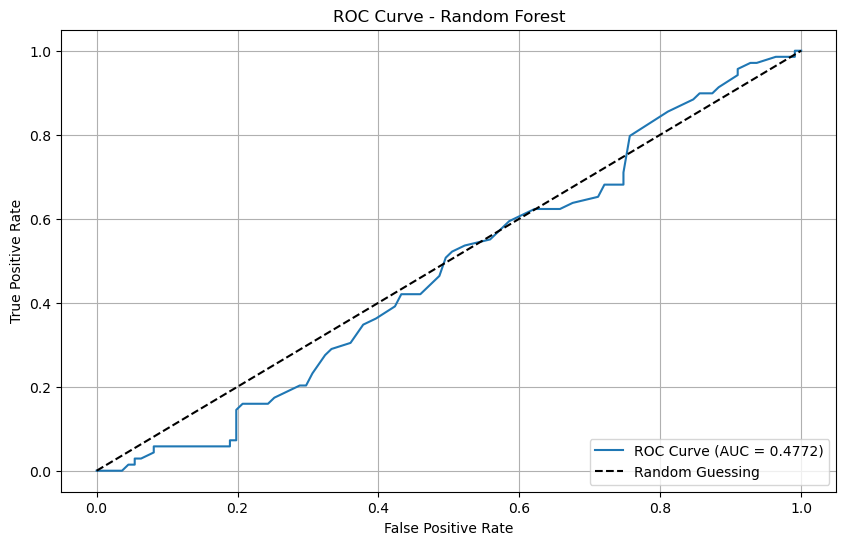

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

features = ['ride_duration', 'distance_covered', 'rider_age']
X = df_encoded[features]
y = df_encoded['electric_bike_used']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=None)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [110]:
if 'weather_condition' in df_encoded.columns:
    df_encoded = pd.get_dummies(df_encoded, columns=['weather_condition'], drop_first=True)
else:
    print("Weather condition column not found in the dataset.")
    
print("Updated Columns:")
print(df_encoded.columns)

Updated Columns:
Index(['city', 'rider_age', 'ride_duration', 'distance_covered',
       'bike_rental_cost', 'residuals', 'bike_model_Electric',
       'bike_model_Mountain', 'bike_model_Standard', 'bike_model_label',
       'bike_model_encoded', 'rider_satisfaction_Low',
       'rider_satisfaction_Medium', 'rider_satisfaction', 'electric_bike_used',
       'weather_condition_Rainy', 'weather_condition_Snowy',
       'weather_condition_Sunny'],
      dtype='object')


In [111]:
from imblearn.over_sampling import SMOTE
features = [
    'ride_duration', 'distance_covered', 'rider_age',
    'weather_condition_Rainy', 'weather_condition_Snowy', 'weather_condition_Sunny'
]

X = df_encoded[features]
y = df_encoded['electric_bike_used']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.5833
ROC AUC Score: 0.5306

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.76      0.69       111
           1       0.44      0.30      0.36        69

    accuracy                           0.58       180
   macro avg       0.54      0.53      0.53       180
weighted avg       0.56      0.58      0.56       180


Confusion Matrix:
[[84 27]
 [48 21]]


In [112]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.5667
ROC AUC Score: 0.4711

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       111
           1       0.15      0.03      0.05        69

    accuracy                           0.57       180
   macro avg       0.38      0.46      0.38       180
weighted avg       0.43      0.57      0.46       180


Confusion Matrix:
[[100  11]
 [ 67   2]]


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10, min_samples_split=10)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC AUC Score:", roc_auc)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.6055555555555555
ROC AUC Score: 0.5019584802193499
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.95      0.75       111
           1       0.40      0.06      0.10        69

    accuracy                           0.61       180
   macro avg       0.51      0.50      0.42       180
weighted avg       0.53      0.61      0.50       180

Confusion Matrix:
 [[105   6]
 [ 65   4]]


In [114]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

features = [
    'ride_duration', 'distance_covered', 'rider_age',
    'weather_condition_Rainy', 'weather_condition_Snowy', 'weather_condition_Sunny',
    'bike_rental_cost'
]
X = df_encoded[features]
y = df_encoded['electric_bike_used']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  
    eval_metric='auc',           
    random_state=42
)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_resampled, y_resampled)

print("Best hyperparameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_
best_xgb.fit(X_resampled, y_resampled)

y_pred = best_xgb.predict(X_test_scaled)
y_pred_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(conf_matrix)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.7889
ROC AUC Score: 0.8616
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       111
           1       0.72      0.74      0.73        69

    accuracy                           0.79       180
   macro avg       0.78      0.78      0.78       180
weighted avg       0.79      0.79      0.79       180

Confusion Matrix:
[[91 20]
 [18 51]]


In [115]:
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [116]:
import xgboost as xgb

if isinstance(best_xgb_model, xgb.XGBModel):
    print("The model is an XGBoost model. Proceeding with feature importance analysis.")
else:
    raise ValueError("The provided model is not an XGBoost model. Please verify.")

The model is an XGBoost model. Proceeding with feature importance analysis.


Feature Importances:
                   Feature  Importance
6         bike_rental_cost    0.308574
0            ride_duration    0.246751
2                rider_age    0.103084
5  weather_condition_Sunny    0.099887
4  weather_condition_Snowy    0.088383
3  weather_condition_Rainy    0.077327
1         distance_covered    0.075994


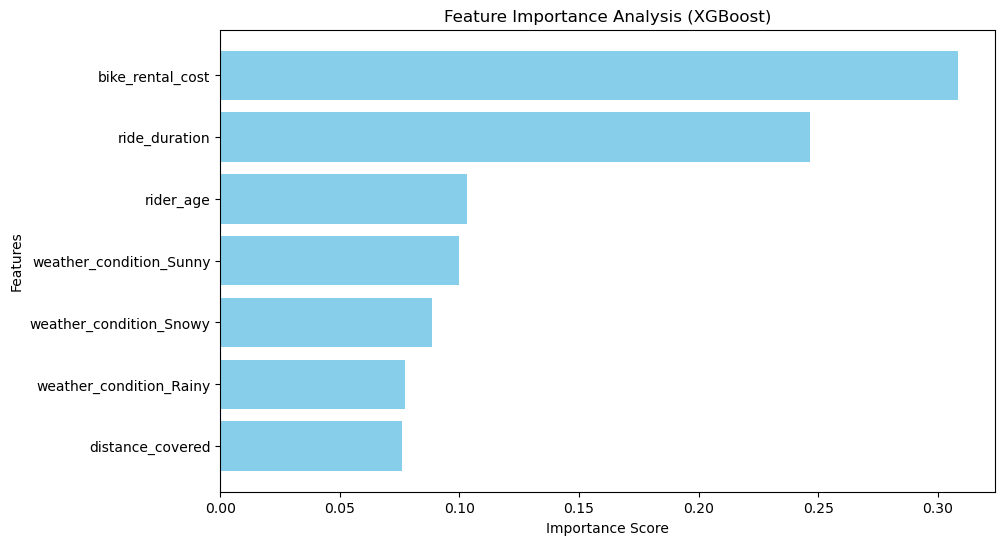

In [117]:
features = [
    'ride_duration', 'distance_covered', 'rider_age',
    'weather_condition_Rainy', 'weather_condition_Snowy', 'weather_condition_Sunny',
    'bike_rental_cost'
]

if isinstance(best_xgb_model, xgb.XGBModel):
    feature_importances = best_xgb_model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    print("Feature Importances:")
    print(importance_df)

    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.title('Feature Importance Analysis (XGBoost)')
    plt.gca().invert_yaxis()
    plt.savefig('feature_importance_xgboost.png', dpi=300, bbox_inches="tight")
    plt.show()
else:
    print("The model is not an XGBoost model. Unable to perform feature importance analysis.")

In [118]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

xgb_model = xgb.XGBClassifier(random_state=42)
linear_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=[('xgb', xgb_model), ('lr', linear_model)],
    final_estimator=LogisticRegression(),  
    cv=5
)

stacking_model.fit(X_train_scaled, y_train)

y_pred = stacking_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, stacking_model.predict_proba(X_test_scaled)[:, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Accuracy: 0.8111
ROC AUC Score: 0.8940
